In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

# the project's folder
# %cd '/gdrive/My Drive/Colab Notebooks/beeWatch'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# Not Necessary cell
# List the content  
!ls -la
!ls -la "/content/gdrive/My Drive/darknet"

In [0]:
!sudo apt-get install tree

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 25 not upgraded.
Need to get 40.7 kB of archives.
After this operation, 105 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tree amd64 1.7.0-5 [40.7 kB]
Fetched 40.7 kB in 1s (65.3 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package tree.
(Reading database ... 144568 files and directories currently instal

In [0]:
!tree /content/gdrive/My\ Drive/darknet/

## STEP 2. Check CUDA release version
Cuda micht be upgraded on Colab, download the matching version of cuDNN 
(eg. Now is release 10.0 and we are using cuDNN (cudnn-10.0-linux-x64-v7.5.0.56.tgz)

In [0]:
# This cell can be commented once you checked the current CUDA version
# CUDA: Let's check that Nvidia CUDA is already pre-installed and which version is it. In some time from now maybe you 
!/usr/local/cuda/bin/nvcc --version


nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


## STEP 3. Install cuDNN according to the current CUDA version
Now, you need to download cuDNN from Nvidia web site. You'll need to sign up on the site.

* Download cuDNN from [Nvidia website](https://developer.nvidia.com/cudnn) 

  * Right now, because we have _**CUDA 10.0**_ preinstalled in Colab runtime, you need download [cuDNN v7.5.0.56 for CUDA v10.0](https://developer.nvidia.com/compute/machine-learning/cudnn/secure/v7.5.0.56/prod/10.0_20190219/cudnn-10.0-linux-x64-v7.5.0.56.tgz) - the file is cudnn-10.0-linux-x64-v7.5.0.56.tgz

* On your local computer, create a folder named _**cuDNN**_ in your local folder _**darknet**_. Copy the _**tgz**_ file there 



In [0]:
# We're unzipping the cuDNN files from your Drive folder directly to the VM CUDA folders
!tar -xzvf /content/gdrive/My\ Drive/darknet/cuDNN/cudnn-10.1-linux-x64-v7.6.5.32.tgz -C /usr/local/
!chmod a+r /usr/local/cuda/include/cudnn.h

# Now we check the version we already installed. Can comment this line on future runs
!cat /usr/local/cuda/include/cudnn.h | grep CUDNN_MAJOR -A 2

cuda/include/cudnn.h
cuda/NVIDIA_SLA_cuDNN_Support.txt
cuda/lib64/libcudnn.so
cuda/lib64/libcudnn.so.7
cuda/lib64/libcudnn.so.7.6.5
cuda/lib64/libcudnn_static.a
#define CUDNN_MAJOR 7
#define CUDNN_MINOR 6
#define CUDNN_PATCHLEVEL 5
--
#define CUDNN_VERSION (CUDNN_MAJOR * 1000 + CUDNN_MINOR * 100 + CUDNN_PATCHLEVEL)

#include "driver_types.h"


## STEP 4. Installing Darknet
Great!! We have all the necessary to start working with Darknet. 

This notebook works with a slightly modified version of darknet, which is based on the [AlexeyAB Darknet repo](https://github.com/AlexeyAB/darknet/)
The changes applied to the original repo are:
* Allowing to use spaces on the darknet configuration files _**obj.data**_. Necessary to work with Google Drive directly.
* Removing some logs on every epoch. The original repo write more logs than the Colab notebook can sync. This creates a long queue during the training. This version only shows the results after every iteration.

You can take a look to the code at the [github repo](https://github.com/kriyeng/darknet/)

> _**TRICK**: Because we want to run the notebook fast every time we will compile darknet only the first time we run this notebook. Then, we'll save the compiled version to your drive. For the future executions we'll copy the compiled one instead of compiling again._ 


**Here comes our first trick to speed up the runtime load time**

* The first time we will:
  * Clone and compile the darknet project.
  * Copy the compiled version to our Google Drive Floder
  
* The next times, instead of compiling it again on every runtime load, we'll copy the compiled version to our VM machine!

When compiling the first time, your output last line has to be something like this:

`g++ -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv` -DGPU (...)`

## STEP 4-A. Cloning and compiling Darkent. ONLY NEEDS TO BE RUN ON THE FIRST EXECUTION!!
In this step we'll clone the darkent repo and compile it. 
* Clone Repo
* Compile Darknet
* Copy compiled version to Drive

When compiling ends, your output last line has to be something like this:

_`g++ -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv` -DGPU (...)_`

In [0]:
# Leave this code uncommented on the very first run of your notebook or if you ever need to recompile darknet again.
# Comment this code on the future runs.
!git clone https://github.com/kriyeng/darknet/
%cd darknet

# Check the folder
!ls

# I have a branch where I have done the changes commented above
!git checkout feature/google-colab

#Compile Darknet
!make

#Copies the Darknet compiled version to Google drive
#!cp ./darknet /content/gdrive/My\ Drive/darknet/bin/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 10068, done.
remote: Total 10068 (delta 0), reused 0 (delta 0), pack-reused 10068
Receiving objects: 100% (10068/10068), 9.94 MiB | 10.15 MiB/s, done.
Resolving deltas: 100% (6758/6758), done.
/content/darknet
3rdparty      CMakeLists.txt	      image_yolov3.sh	     scripts
appveyor.yml  CMakeSettings.json      include		     src
build	      DarknetConfig.cmake.in  json_mjpeg_streams.sh  video_v2.sh
build.ps1     darknet.py	      LICENSE		     video_yolov3.sh
build.sh      darknet_video.py	      Makefile
cfg	      data		      net_cam_v3.sh
cmake	      image_yolov2.sh	      README.md
Branch 'feature/google-colab' set up to track remote branch 'feature/google-colab' from 'origin'.
Switched to a new branch 'feature/google-colab'
mkdir -p obj
mkdir -p backup
mkdir -p results
chmod +x *.sh
g++ -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -W

In [0]:
import os
print(os.getcwd())
!ls
#!ls /content/gdrive/My\ Drive/darknet/bin



/content
gdrive	sample_data


In [0]:
!ls /usr/local/bin

asadmin			  jupyter			pyrsa-keygen
bokeh			  jupyter-bundlerextension	pyrsa-priv2pub
bundle_image		  jupyter-console		pyrsa-sign
cfadmin			  jupyter-kernel		pyrsa-verify
chardetect		  jupyter-kernelspec		pytest
cmake			  jupyter-migrate		py.test
community		  jupyter-nbconvert		python
convert-caffe2-to-onnx	  jupyter-nbextension		R
convert-onnx-to-caffe2	  jupyter-notebook		range-detector
coverage		  jupyter-qtconsole		route53
coverage3		  jupyter-run			rst2html4.py
coverage-3.6		  jupyter-serverextension	rst2html4.pyc
coveralls		  jupyter-troubleshoot		rst2html5.py
cpack			  jupyter-trust			rst2html5.pyc
cq			  kaggle			rst2html.py
ctest			  kill_instance			rst2html.pyc
cwutil			  launch_instance		rst2latex.py
cygdb			  list_instances		rst2latex.pyc
cython			  lss3				rst2man.py
cythonize		  lunar-find			rst2man.pyc
dask-mpi		  make_image_classifier		rst2odt_prepstyles.py
dask-remote		  make_nearest_neighbour_index	rst2odt_prepstyles.pyc
dask-scheduler		  markdown_py			rst2odt.py
dask-

## STEP 4-B. Copying the compiled version of Darknet from Drive. UNCOMMENT AFTER FIRST EXECUTION
Copy the darknet compiled version from drive to the VM.
* Make the local darknet folder
* Copy the darknet file
* Set execution permissions

In [0]:
# Uncomment after the first run, when you have a copy of compiled darkent in your Google Drive

# Makes a dir for darknet and move there
!mkdir darknet
%cd darknet

# Copy the Darkent compiled version to the VM local drive
!cp -r /content/gdrive/My\ Drive/darknet/bin/darknet/ ./darknet

# Set execution permissions to Darknet
!chmod +x ./darknet


/content/darknet


In [0]:
#%cd darknet/
print(os.getcwd())
!chmod +x ./darknet
!ls -la

/content/darknet/darknet
total 245676
drwx--x--x 15 root root      4096 May  1 22:49 .
drwxr-xr-x  3 root root      4096 May  1 22:38 ..
drwx------  4 root root      4096 May  1 22:38 3rdparty
-rw-------  1 root root      5899 May  1 22:39 appveyor.yml
drwx------  2 root root      4096 May  1 22:49 backup
drwx------  3 root root      4096 May  1 22:39 build
-rw-------  1 root root      8163 May  1 22:39 build.ps1
-rw-------  1 root root      2886 May  1 22:39 build.sh
drwx------  3 root root      4096 May  1 22:44 cfg
drwx------  2 root root      4096 May  1 22:38 .circleci
drwx------  3 root root      4096 May  1 22:44 cmake
-rw-------  1 root root     17356 May  1 22:38 CMakeLists.txt
-rw-------  1 root root      6380 May  1 22:38 CMakeSettings.json
-rwx--x--x  1 root root   3213624 May  1 22:49 darknet
-rw-------  1 root root      1254 May  1 22:38 DarknetConfig.cmake.in
-rw-------  1 root root     16255 May  1 22:44 darknet.py
-rw-------  1 root root      4010 May  1 22:44 darknet_

## STEP 5. Runtime configuration finished!
Let's chek it out!

If you are running this notebook for the first time, you can run the following cells in order to check if everything goes as expected!




## Some Utils
Let's add some utils that maybe can be useful.

These utils are:
* imgShow() - Will help us to show an image in the remote VM
* download() - Will allow you to get some file from your notebook in case you need to
* upload() - You can upload files to your current folder on the remote VM.

Thanks to [Ivan Goncharov](https://twitter.com/Ivangrov) for these helpers!

In [0]:
#download files
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  #plt.rcParams['figure.figsize'] = [10, 5]
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()
  
  
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)
def download(path):
  from google.colab import files
  files.download(path)

In [0]:
# Not necessary cell
# Get yolov3 weights
!wget https://pjreddie.com/media/files/yolov3.weights

--2020-04-25 20:02:21--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  5.75MB/s    in 45s     

2020-04-25 20:03:06 (5.22 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



**NOTE:** The following test only will work when the darknet is compiled in the runtime. This demo uses some data from the original darknet folders. For your Object detection projects, you'll have these necessary files on your local folder.

In [0]:
!cp /content/gdrive/My\ Drive/darknet/yolov3.weights /content/darknet/darknet

In [0]:
!cp -r /content/gdrive/My\ Drive/darknet/bin/darknet/cfg/coco.names /content/darknet/cfg
#!ls /content/darknet/cfg -l
!cp -r /content/gdrive/My\ Drive/darknet/bin/darknet/cfg/coco.names ./cfg


In [0]:
#!chmod +x ./darknet
!ls ./cfg -l

total 1156
-rw------- 1 root root  94180 May  1 22:44 9k.labels
-rw------- 1 root root  99137 May  1 22:44 9k.names
-rw------- 1 root root 149465 May  1 22:44 9k.tree
-rw------- 1 root root    879 May  1 22:44 alexnet.cfg
-rw------- 1 root root   1250 May  1 22:44 cifar.cfg
-rw------- 1 root root   1174 May  1 22:44 cifar.test.cfg
-rw------- 1 root root    387 May  1 22:44 coco9k.map
-rw------- 1 root root    216 May  1 22:44 coco.data
-rw------- 1 root root      3 May  1 22:44 coco.names
-rw------- 1 root root    273 May  1 22:44 combine9k.data
-rw------- 1 root root    535 May  1 22:44 crnn.train.cfg
-rw------- 1 root root   2046 May  1 22:44 darknet19_448.cfg
-rw------- 1 root root   1963 May  1 22:44 darknet19.cfg
-rw------- 1 root root   5815 May  1 22:44 darknet53.cfg
-rw------- 1 root root   1051 May  1 22:44 darknet.cfg
-rw------- 1 root root  19764 May  1 22:44 densenet201.cfg
-rw------- 1 root root   2182 May  1 22:44 extraction22k.cfg
-rw------- 1 root root   2109 May  1 22:

In [0]:
# Not necessary cell
# Execute darknet using YOLOv3 model with pre-trained weights to detect objects on 'person.jpg'
!./darknet detect "cfg/yolov3.cfg" "yolov3.weights" "data/person.jpg" -dont-show

# Show the result using the helper imgShow()
#imShow('predictions.jpg')

layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32 0.299 BF
   1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64 1.595 BF
   2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32 0.177 BF
   3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128 1.595 BF
   6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
   7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
  10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2   104 x 104 x 128   ->    52 x  52 x 256 1.595 BF
  13 conv    128  1 x 1 / 1    52 x  52 x 256   ->    52 x  52 x 128 0.177 BF
  14 c

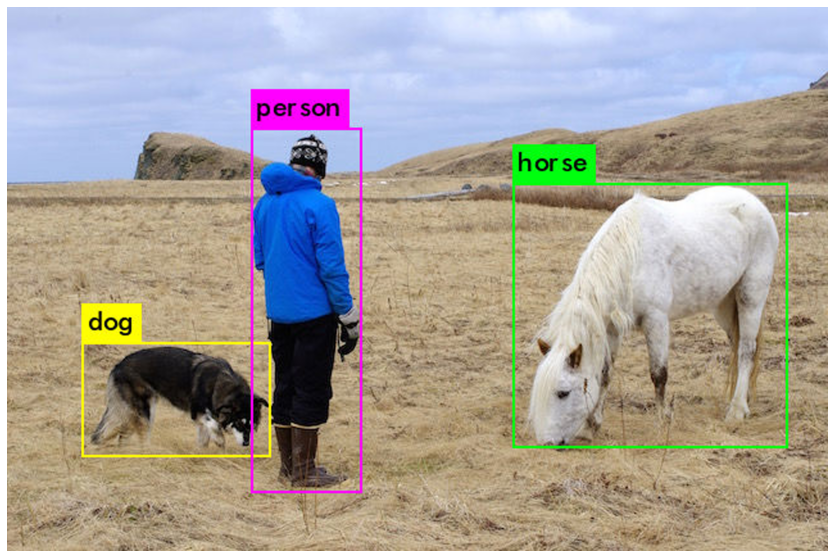

In [0]:

from IPython.display import Image
Image("data/person.jpg")

imShow('predictions.jpg')



# PART 2. Training YOLO

 > _**TRICK:** Every time you want to run all your cells automatically you can go to the **> Menu > Runtime > run all**. Maybe you don't want to execute the entire notebook. You can write the following cell where you want to stop the process and uncoment the **`assert False`** command. This will throw an error and will stop to run more cells. Thanks to: [This thread](https://groups.google.com/forum/#!topic/jupyter/ELftSFSiedQ)_




In [0]:
# don't go beyond here with Run All
#assert False

## PART 2. STEP 0. Preparing your data and configuration files 

Before going further let's take a look at what configuration files you need to have in your local drive _`darknet`_

![Yolov3 configuration files cheat sheet.jpg](http://blog.ibanyez.info/download/B20190410T000000072.png)

You can download the cheat sheet [here](http://blog.ibanyez.info/download/B20190410T000000072.png)

If you need deeper explanations on how to prepare your data sets, annotation and deep learning, visit [How to train YOLOv3 using Darknet framework and optimize the VM runtime load times](post link)


> **TRICK:** You have to be carefully configuring paths on your config files. _*obj.data*_ file needs to have spaces on the path escaped with _**\**_. Like this: **_/content/gdrive/My\ Drive/darknet/train.txt_**. But, in files **_train.txt_** and **_test.txt_** does not!




In [0]:
import os
print(os.getcwd())
#!ls -a
!ls /content/gdrive/My\ Drive/darknet

/content/darknet/darknet
backup	  cuDNN		     img	test.txt   yolov3.cfg
backup_1  darknet53.conv.74  obj.data	train.txt  yolov3.weights
bin	  images_test	     obj.names	videos


## PART 2. STEP 1. Loading files to VM local drive
The network speed between Google Drive and Colab VM can have an impact on your training speed accessing to your dataset images.

You can have 3 possible approaches depending on the size of your dataset. 

> _**NOTE:** This step is not necessary for all the configuration files and weights. They can be accessed directly from Google Drive without considerable performance issues. **This step is only for the dataset images and annotations**_

* **Option 1** - You can try  to use directly the files from Google Drive _`img/`_ folder. Depending on your dataset maybe this can be more than good.
* **Option 2** - Before start training copy your dataset from Google Drive to the local VM filesystem. Maybe can be a good practice to copy as one single tar file and decompress in your VM local _`img/`_ folder
* **Option 3** - If your dataset is quite big, maybe you can upload to a git repository and clone from here. Usually transfer time between are much better. If you have to decide I have the feeling that bitbucket have better speed transfer times than github, but please, don't take this as confirmed, **I haven't done specific tests on that, I could be wrong!** 




#### PART 2. STEP 1 - Option 1. Using files from Google Drive directly.
You don't have to do anything here. Your **_train.txt_** should have the correct path:
* **/content/grdive/My Drive/darknet/img/image001.jpg**. As said before, don't use escaped white space for the paths on _**train.txt**_ and _**test.txt**_

#### PART 2. STEP 1 - Option 2A. Copying files from Google Drive to VM local filesystem.
Execute the follow cell to copy your files

In [0]:
print(os.getcwd())
!ls ./img

In [0]:
# Copy fils from Google Drive to the VM local filesystem
!cp -r "/content/gdrive/My Drive/darknet/img" ./img


In [0]:
!cp -r "/content/gdrive/My Drive/darknet/vid" ./vid

In [0]:
print(os.getcwd())
!ls ./vid

/content/darknet/darknet
bees_2.mp4  mucho_bess_2.mp4


## PART 3. Finally, Train your model!

When you execute the following command, your model will start training.

You will have a log line per epoch. On each iteration you will see how your training is going.

> **TRICK: Darknet copies a backup of your trained weights every 100 iterations. As magic, this file will be synced to your local drive on your computer, as well as the backups darknet do every 1000 iterations, saving it on a separate file.**





In [0]:
#!wget https://pjreddie.com/media/files/darknet53.conv.74

--2020-04-25 10:56:14--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M   839KB/s    in 3m 38s  

2020-04-25 10:59:54 (726 KB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



In [0]:
#!cp darknet53.conv.74 /content/gdrive/My\ Drive/darknet/

In [0]:
!./darknet detector train "/content/gdrive/My Drive/darknet/bee.data" "/content/gdrive/My Drive/darknet/yolov3_bees.cfg" "/content/gdrive/My Drive/darknet/backup/yolov3_last.weights" -dont_show 
# !./darknet detector train "/content/gdrive/My Drive/darknet/obj.data" "/content/gdrive/My Drive/darknet/yolov3.cfg" "/content/gdrive/My Drive/darknet/backup/yolov3_last.weights" -dont_show 

Streaming output truncated to the last 5000 lines.

 3683: 0.482641, 0.472582 avg loss, 0.001000 rate, 5.524758 seconds, 235712 images
Loaded: 4.401457 seconds

 3684: 0.439788, 0.469302 avg loss, 0.001000 rate, 5.323193 seconds, 235776 images
Loaded: 4.515806 seconds

 3685: 0.595585, 0.481931 avg loss, 0.001000 rate, 5.574295 seconds, 235840 images
Loaded: 4.422404 seconds

 3686: 0.562862, 0.490024 avg loss, 0.001000 rate, 5.943768 seconds, 235904 images
Loaded: 4.206351 seconds

 3687: 0.340225, 0.475044 avg loss, 0.001000 rate, 5.455701 seconds, 235968 images
Loaded: 4.476212 seconds

 3688: 0.587808, 0.486320 avg loss, 0.001000 rate, 5.635364 seconds, 236032 images
Loaded: 4.407005 seconds

 3689: 0.600072, 0.497695 avg loss, 0.001000 rate, 5.872504 seconds, 236096 images
Loaded: 4.259359 seconds

 3690: 0.364622, 0.484388 avg loss, 0.001000 rate, 5.616921 seconds, 236160 images
Resizing
480 x 480 
 try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 
Loade

In [0]:
# from scratch 
!./darknet detector train "/content/gdrive/My Drive/darknet/obj.data" "/content/gdrive/My Drive/darknet/yolov3.cfg" "/content/gdrive/My Drive/darknet/darknet53.conv.74" -dont_show 

/bin/bash: ./darknet: No such file or directory


KeyboardInterrupt: ignored

# Test Images

In [0]:
!./darknet detect "/content/gdrive/My Drive/darknet/yolov3.cfg" "/content/gdrive/My Drive/darknet/backup/yolov3_last.weights" ./img/BeeWatch8304-20190727-153421-1564234461_29082.png
#!./darknet detect "cfg/yolov3.cfg" "yolov3.weights" "data/person.jpg" -dont-show
boxes = []
confidences = []
class_ids = []

layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32 0.639 BF
   1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64 3.407 BF
   2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32 0.379 BF
   3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64 3.407 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128 3.407 BF
   6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64 0.379 BF
   7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128 3.407 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64 0.379 BF
  10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128 3.407 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2   152 x 152 x 128   ->    76 x  76 x 256 3.407 BF
  13 conv    128  1 x 1 / 1    76 x  76 x 256   ->    76 x  76 x 128 0.379 BF
  14 c

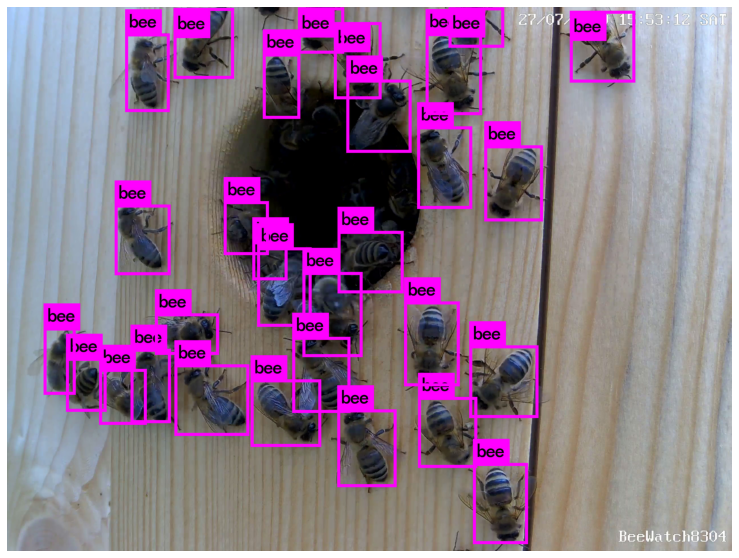

In [0]:
imShow('predictions.jpg')

In [0]:
!./darknet detect "/content/gdrive/My Drive/darknet/yolov3.cfg" "/content/gdrive/My Drive/darknet/backup/yolov3_last.weights" ./img/0120190927131427_6048.png
imShow('predictions.jpg')

In [0]:
!./darknet detect "/content/gdrive/My Drive/darknet/yolov3.cfg" "/content/gdrive/My Drive/darknet/backup/yolov3_last.weights" /content/gdrive/My\ Drive/darknet/images_test/frame248.jpg
imShow('predictions.jpg')

## Test Video


In [0]:
#!mkdir output
!ls ./output/

In [0]:
# import the necessary packages
import numpy as np
import imutils
import time
import cv2
import os
from google.colab.patches import cv2_imshow

# arguments
args_confidence = 0.5
args_threshold = 0.3
weightsPath = '/content/gdrive/My Drive/darknet/backup/yolov3_last.weights'
configPath = '/content/gdrive/My Drive/darknet/yolov3.cfg'
videoPath = '/content/gdrive/My Drive/darknet/vid/bees_2.mp4'
outputPath = './output' #'/content/gdrive/My Drive/darknet/output/'

# load the COCO class labels our YOLO model was trained on
labelsPath = '/content/gdrive/My Drive/darknet/obj.names'  
LABELS = open(labelsPath).read().strip().split("\n")
# initialize a list of colors to represent each possible class label
np.random.seed(42)
COLORS = np.random.randint(0, 255, size=(len(LABELS), 3), dtype="uint8")
# derive the paths to the YOLO weights and model configuration


#'/content/gdrive/My Drive/darknet/obj.data'  

# load our YOLO object detector trained on COCO dataset (80 classes)
# and determine only the *output* layer names that we need from YOLO
print("[INFO] loading YOLO from disk...")
net = cv2.dnn.readNetFromDarknet(configPath, weightsPath)
ln = net.getLayerNames()
ln = [ln[i[0] - 1] for i in net.getUnconnectedOutLayers()]

# initialize the video stream, pointer to output video file, and
# frame dimensions
vs = cv2.VideoCapture(videoPath)
writer = None
(W, H) = (None, None)
# try to determine the total number of frames in the video file
try:
	prop = cv2.cv.CV_CAP_PROP_FRAME_COUNT if imutils.is_cv2() \
		else cv2.CAP_PROP_FRAME_COUNT
	total = int(vs.get(prop))
	print("[INFO] {} total frames in video".format(total))
# an error occurred while trying to determine the total
# number of frames in the video file
except:
	print("[INFO] could not determine # of frames in video")
	print("[INFO] no approx. completion time can be provided")
	total = -1

# loop over frames from the video file stream
while True:
	# read the next frame from the file
	(grabbed, frame) = vs.read()
	# if the frame was not grabbed, then we have reached the end
	# of the stream
	if not grabbed:
		break
	# if the frame dimensions are empty, grab them
	if W is None or H is None:
		(H, W) = frame.shape[:2]
	# ggg try display  
	cv2_imshow(frame) # Note cv2_imshow, not cv2.imshow
	# construct a blob from the input frame and then perform a forward
	# pass of the YOLO object detector, giving us our bounding boxes
	# and associated probabilities
	blob = cv2.dnn.blobFromImage(frame, 1 / 255.0, (416, 416), swapRB=True, crop=False)
	net.setInput(blob)
	start = time.time()
	layerOutputs = net.forward(ln)
	end = time.time()
	# initialize our lists of detected bounding boxes, confidences,
	# and class IDs, respectively
	boxes = []
	confidences = []
	classIDs = []
	# loop over each of the layer outputs
	for output in layerOutputs:
		# loop over each of the detections
		for detection in output:
			# extract the class ID and confidence (i.e., probability)
			# of the current object detection
			scores = detection[5:]
			classID = np.argmax(scores)
			confidence = scores[classID]
			# filter out weak predictions by ensuring the detected
			# probability is greater than the minimum probability
			if confidence > args_confidence:
				# scale the bounding box coordinates back relative to
				# the size of the image, keeping in mind that YOLO
				# actually returns the center (x, y)-coordinates of
				# the bounding box followed by the boxes' width and
				# height
				box = detection[0:4] * np.array([W, H, W, H])
				(centerX, centerY, width, height) = box.astype("int")
				# use the center (x, y)-coordinates to derive the top
				# and and left corner of the bounding box
				x = int(centerX - (width / 2))
				y = int(centerY - (height / 2))
				# update our list of bounding box coordinates,
				# confidences, and class IDs
				boxes.append([x, y, int(width), int(height)])
				confidences.append(float(confidence))
				classIDs.append(classID)
	# apply non-maxima suppression to suppress weak, overlapping
	# bounding boxes
	idxs = cv2.dnn.NMSBoxes(boxes, confidences, args_confidence,
		args_threshold)
	# ensure at least one detection exists
	if len(idxs) > 0:
		# loop over the indexes we are keeping
		for i in idxs.flatten():
			# extract the bounding box coordinates
			(x, y) = (boxes[i][0], boxes[i][1])
			(w, h) = (boxes[i][2], boxes[i][3])
			# draw a bounding box rectangle and label on the frame
			color = [int(c) for c in COLORS[classIDs[i]]]
			cv2.rectangle(frame, (x, y), (x + w, y + h), color, 2)
			text = "{}: {:.4f}".format(LABELS[classIDs[i]],
				confidences[i])
			cv2.putText(frame, text, (x, y - 5),
				cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
	# check if the video writer is None
	if writer is None:
		# initialize our video writer
		fourcc = cv2.VideoWriter_fourcc(*"MJPG")
		writer = cv2.VideoWriter(outputPath, fourcc, 30,
			(frame.shape[1], frame.shape[0]), True)
		# some information on processing single frame
		if total > 0:
			elap = (end - start)
			print("[INFO] single frame took {:.4f} seconds".format(elap))
			print("[INFO] estimated total time to finish: {:.4f}".format(
				elap * total))
	# write the output frame to disk
	writer.write(frame)
# release the file pointers
print("[INFO] cleaning up...")
writer.release()
vs.release()

In [0]:
#video easy command
# works but does not show video and does not save video output

!./darknet detector demo '/content/gdrive/My Drive/darknet/obj.data' '/content/gdrive/My Drive/darknet/yolov3.cfg' '/content/gdrive/My Drive/darknet/backup/yolov3_last.weights' '/content/gdrive/My Drive/darknet/vid/bees_2.mp4' -dont_show

Demo
layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32 0.639 BF
   1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64 3.407 BF
   2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32 0.379 BF
   3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64 3.407 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128 3.407 BF
   6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64 0.379 BF
   7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128 3.407 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64 0.379 BF
  10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128 3.407 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2   152 x 152 x 128   ->    76 x  76 x 256 3.407 BF
  13 conv    128  1 x 1 / 1    76 x  76 x 256   ->    76 x  76 x 128 0.379 BF
 

In [0]:
from net.build import TFNet
import cv2

cap = cv2.VideoCapture('/content/gdrive/My Drive/darknet/vid/bees_2.mp4')
model_path = "/content/gdrive/My Drive/darknet/yolov3.cfg"
weights_path = "/content/gdrive/My Drive/darknet/backup/yolov3_last.weights"

options = {"model": model, "load": weights_path, "threshold": 0.1, "gpu": 0.3}
tfnet = TFNet(options)
while(cap.isOpened()):
    ret, frame = cap.read()
    result = tfnet.return_predict(frame)
    #DO SOMEHTING WITH RESULTS

cap.release()

ModuleNotFoundError: ignored

In [0]:
#!./darknet detector demo cfg/coco.data cfg/yolov3.cfg yolov3.weights <video file>
## Video
# To exit and release the capture, press q
import cv2
from darkflow.net.build import TFNet
import matplotlib.pyplot as plt
import numpy as np
import time

cap = cv2.VideoCapture('/content/gdrive/My Drive/darknet/vid/bees_2.mp4')
colors=[tuple(255 * np.random.rand(3)) for i in range(5)]

options = {
 'model': '/content/gdrive/My Drive/darknet/yolov3.cfg',
 'load': '/content/gdrive/My Drive/darknet/backup/yolov3_last.weights',
 'threshold': 0.3
    
}
tfnet = TFNet(options)

while(cap.isOpened()):
    stime= time.time()
    ret, frame = cap.read()
    results = tfnet.return_predict(frame)
    if ret:
        for color, result in zip(colors, results):
            tl = (result['topleft']['x'], result['topleft']['y'])
            br = (result['bottomright']['x'], result['bottomright']['y'])
            label = result['label']
            frame= cv2.rectangle(frame, tl, br, color, 7)
            frame= cv2.putText(frame, label, tl, cv2.FONT_HERSHEY_TRIPLEX, 1, (0,0,0), 2)
        cv2.imshow('frame', frame)
        print('FPS {:1f}'.format(1/(time.time() -stime)))
        if cv2.waitKey(1)  & 0xFF == ord('q'):
            break
    else:
        break
cap.release()
cv2.destroyAllWindows()

ModuleNotFoundError: ignored